**CSI 4506 Introduction à l'Intelligence Artificielle** <br/>
*Devoir 1 : Préparation des Données*

# Identification

Nom : Jonathan Domingue <br/>
Numéro d'étudiant : 300246863




#### Importing Libraries which we will be using throughout the notebook

In [1]:
#Import pandas
import pandas as pd

#Import numpy
import numpy as np

#Import matplotlib
import matplotlib.pyplot as plt

# Import altair
import altair as alt

# Import Seaborn
import seaborn as sns

# Import sklearn
from sklearn.preprocessing import RobustScaler

# Import the Box Cox
from scipy.stats import boxcox

# Import OneHot Encoder from Sklearn
from sklearn.preprocessing import OneHotEncoder

# Import sklearn to eventually split our dataset
from sklearn.model_selection import train_test_split



Matplotlib created a temporary cache directory at C:\Users\domin\AppData\Local\Temp\matplotlib-wb07osdi because the default path (C:\Users\domin\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Lire un de données

Comme indiqué dans la description du devoir, il doit être possible pour les correcteurs d'exécuter votre notebook sans nécessiter de téléchargements.

Pour faciliter l'accès à l'ensemble de données sans nécessiter de téléchargements, utilisez les données fournies dans le dépôt public GitHub et fournissez un lien vers la version brute de l'ensemble de données.

Le lien vers la version brute est le suivant :

*https://raw.githubusercontent.com/NOM_UTILISATEUR_GITHUB/NOM_DÉPÔT/main/NOM_JEU_DONNÉES.csv*

Par exemple :

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv](https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Maintenant, fournissez le lien vers VOTRE ensemble de données et lisez-le :


In [2]:

url_1="https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/01/glass.csv"
url_2= "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/02/dermatology_database_1.csv"
url_3="https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv"
url_4="https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/04/car.data"
url_5= "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/05/WineQT.csv"
url_6="https://github.com/turcotte/csi4106-f24/raw/main/assignments-data/a1/06/16P.csv"

#Train
url_7= "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/07/train.csv"
# Train for dataset
url_8="https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/07/test.csv"

#Reading the Glass Dataset
glass_dataset= pd.read_csv(url_1)

# Reading the Dermatology Dataset 
derm_dataset = pd.read_csv(url_2)

# Reading the Mother's Maternal Health Risk Dataset
maternalHealthRisk_dataset = pd.read_csv(url_3)

# Readubg the Car Dataset
car_dataset = pd.read_csv(url_4)

# Reading the Wine Dataset
wine_dataset= pd.read_csv(url_5)


## Reading the sixteen personalities dataset
sixteenP_dataset = pd.read_csv(url_6 ,  encoding='unicode_escape')


#Reading Credit Score Dataset

##  Training dataset
credit_score_dataset_train = pd.read_csv(url_7)
## Test Dataset
credit_score_dataset_test = pd.read_csv(url_8)
                               

C:\Users\domin\AppData\Local\Temp\ipykernel_33416\2044294521.py:36: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  credit_score_dataset_train = pd.read_csv(url_7)


## Directives

Les questions suivantes sont pour le Devoir 1. Sous chaque question, nous avons fourni une cellule de code initiale. Vous êtes encouragés à ajouter des cellules de code supplémentaires pour maintenir une séparation logique de votre code. Par exemple, placez la définition d'une fonction dans une cellule et son exécution dans une cellule suivante. Cette approche aidera à préserver la clarté et à améliorer la lisibilité en évitant de placer trop de code dans une seule cellule.

1. **Analyse des valeurs manquantes** : Examinez les jeux de données pour identifier et évaluer les valeurs manquantes dans divers attributs. Les valeurs manquantes peuvent être représentées par des symboles tels que '?', des chaînes vides ou d'autres substituts.

    1.1 Parmi les options listées, quels sont les jeux de données qui contiennent des valeurs manquantes ? Plus précisément, quel attribut ou quels attributs ont des valeurs manquantes ?

    1.2 Décrivez la méthodologie utilisée pour cette investigation, et fournissez le code correspondant.

    1.3 L'imputation des données consiste à remplacer les données manquantes ou incomplètes par des valeurs substituées pour préserver l'intégrité de l'ensemble de données en vue d'analyses ultérieures. Proposez des stratégies d'imputation pour chaque attribut avec des valeurs manquantes.


### Writing a Function to check for Missing values in the Different Datasets

In [3]:
def detect_missing_values(df, dataset_name):
    missing_placeholders = ["?", "", "_", "-", "__", "___", "____", "_____"] 
    df.replace(missing_placeholders, np.nan, inplace=True)

    # Check for missing values in the DataFrame
    missing_values_count = df.isnull().sum()

    # If any column has missing values, display them
    if missing_values_count.any():
        print(f"There are missing values in the {dataset_name} dataset: ")
        print(missing_values_count[missing_values_count > 0])  # Print columns with missing values
        print()
    else:
        print(f"No missing values found in the {dataset_name} dataset.")
        print()

                               

#### Dataset1: Glass Dataset

In [4]:
glass_dataset.head()


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
detect_missing_values(glass_dataset, "Glass")

No missing values found in the Glass dataset.



#### Dataset2: Dermatology 

In [6]:
derm_dataset.head()


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [7]:
detect_missing_values(derm_dataset, "Derm")

There are missing values in the Derm dataset: 
age    8
dtype: int64



From the output of our function, we can deduce that we have 8 missing values in the age column in the Dermatology Dataset



#### Imputation Strategy for Features with Missing Values in Dataset2

#### Feature: Age

Mean Imputation:
A common method for handling missing numerical values is to replace them with the mean of the column. This approach is easy to implement but can be problematic if the data contains outliers, as the mean is sensitive to extreme values.

Median Imputation:
For numerical data that has outliers or a skewed distribution, median imputation is often a better choice. The median represents the middle value of the dataset and is less affected by extreme values, making it a more robust option. For example, if the age column has a few extremely high or low values, using the median instead of the mean can provide a more accurate imputation.


In our case before deciding which of the two strategies to adopt we will first try to find the skewness. We will assume that if we have a relatively symmetrical distribution we will just take the mean.


In [8]:
# Replace specific placeholders (e.g., '?', '_', etc.) with NaN after loading
derm_dataset.replace(['?', '_', '__', '___', '____', '_____', '______', '_______'], np.nan, inplace=True)

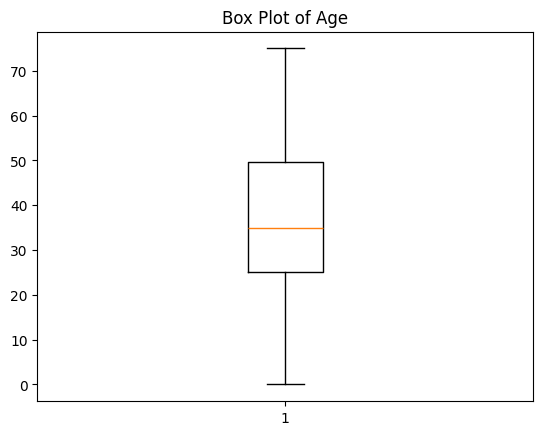

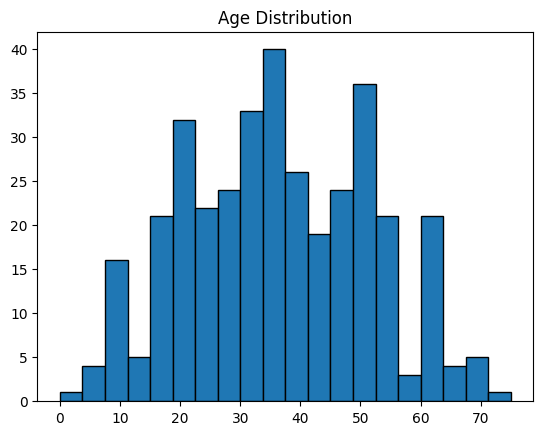

In [9]:
# Box plot
derm_dataset['age'] = pd.to_numeric(derm_dataset['age'], errors='coerce')

# Drop any rows where 'age' is NaN
derm_dataset = derm_dataset.dropna(subset=['age'])

# Box plot
plt.boxplot(derm_dataset['age'])
plt.title('Box Plot of Age')
plt.show()

# Histogram
plt.hist(derm_dataset['age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.show()

In [10]:
skewness = derm_dataset['age'].skew()
print(f"Skewness of Age: {skewness}")



Skewness of Age: 0.0733521062607817


In the skewness of Age, we notice that the skewness is relatively close to zero. This means that we have a relatively symmetrical distribution, which we can also observe from the plot. We will just replace the missing values with the mean of the column

### Demonstration of how we do the Imputation 

Here we decided to use the demonstration of imputation with some code for the dataset2.

In [11]:
## We wukk yse the mean and replace it inside the missing values for the dataset2
derm_dataset['age'] = pd.to_numeric(derm_dataset['age'], errors='coerce')  # Ensure 'we have numeric values for age


In [12]:
derm_dataset['age'] = derm_dataset['age'].fillna(derm_dataset['age'].mean())


In [13]:
print(derm_dataset['age'])

0      55.0
1       8.0
2      26.0
3      40.0
4      45.0
       ... 
361    25.0
362    36.0
363    28.0
364    50.0
365    35.0
Name: age, Length: 358, dtype: float64


In [14]:
print(derm_dataset.isnull().sum())


erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

We now can clearly see that we have no more missing values in age. We successfully replaced it with the mean for all rows of age with missing values

#### Dataset3: Maternal Health Risk

In [15]:
maternalHealthRisk_dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [16]:
detect_missing_values(maternalHealthRisk_dataset, "Maternal Health Risk")

No missing values found in the Maternal Health Risk dataset.



#### Dataset4: Car Evaluation

In [17]:
car_dataset.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


From the header above we see that there seems to be a little issue with the header. We can fix this

In [18]:
# We will create an array with the correct headers
# I used the headers and info there: https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/04/car.c45-names
#To adjust the columns accordingly
car_columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class_value']
car_dataset.columns = car_columns


##### Check if change was made correctly

In [19]:
car_dataset.head()

,buying,maint,doors,persons,lug_boot,safety,class_value
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


We see that changes were made correctly. Now we can check for missing values.

In [20]:
detect_missing_values(car_dataset, "Car Evaluation Dataset")

No missing values found in the Car Evaluation Dataset dataset.



#### Dataset5: Wine Quality

In [21]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [22]:
detect_missing_values(wine_dataset, "Wine Quality Dataset")

No missing values found in the Wine Quality Dataset dataset.



#### Dataset6: 16 Personalities Dataset

In [23]:
sixteenP_dataset.head()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


In [24]:
detect_missing_values(sixteenP_dataset, "Sixteen Personalities Dataset")

No missing values found in the Sixteen Personalities Dataset dataset.



#### Dataset7: Credit Score Classification Dataset

In [25]:
credit_score_dataset_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [26]:
detect_missing_values(credit_score_dataset_train, "Credit Score Classification Dataset")

There are missing values in the Credit Score Classification Dataset dataset: 
Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_Mix                 20195
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64



In this dataset, we notice that a lot of columns have missing values. 

Name:  9,985 missing values

Monthly_Inhand_Salary: 15,002 missing values

Type_of_Loan: 11,408 missing values

Num_of_Delayed_Payment: 7,002 missing values

Changed_Credit_Limit: 2,091 missing values

Num_Credit_Inquiries: 1,965 missing values

Credit_Mix: 20,195 missing values

Credit_History_Age: 9,030 missing values

Amount_invested_monthly: 4,479 missing values

Monthly_Balance: 1,200 missing values

#### Dataset7: Credit Score Classification Dataset Test Dataset

In [27]:
credit_score_dataset_test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [28]:
detect_missing_values(credit_score_dataset_test, "Credit Score Classification Test Dataset")

There are missing values in the Credit Score Classification Test Dataset dataset: 
Name                       5015
Monthly_Inhand_Salary      7498
Type_of_Loan               5704
Num_of_Delayed_Payment     3498
Changed_Credit_Limit       1059
Num_Credit_Inquiries       1035
Credit_Mix                 9805
Credit_History_Age         4470
Amount_invested_monthly    2271
Monthly_Balance             562
dtype: int64



We also notice missing values similarly to the training dataset.


#### Imputation Strategy for Features with Missing Values in Dataset7 (Train and Test)

##### Numerical Variables

Numerical features, such as Monthly_Inhand_Salary, Num_of_Delayed_Payment, and Credit_History_Age,  there are several approaches to handle missing values effectively.

Mean Imputation:
A common method for dealing with missing numerical values is to replace them with the mean of the column. This method is easy to apply but can be problematic if the data contains outliers, as the mean is sensitive to extreme values. 

Median Imputation:
For numerical data that has outliers or a skewed distribution, median imputation is often a better choice. The median represents the middle value of the dataset and is less affected by extreme values, making it a potentially better option. For example, if the Num_of_Delayed_Payment column has a few extremely high values, using the median instead of the mean can provide a more accurate imputation.



#### Categorical Variables

Categorical features in the dataset, such as Name, Type_of_Loan, and Credit_Mix, require careful handling when they contain missing values. Since these features represent categories or labels, the imputation process focuses on maintaining the integrity of the dataset.

Mode Imputation (Replacing with Most Frequent Category):
One of the simplest ways to handle missing values in categorical columns is by replacing them with the most frequent category in the dataset. This method assumes that the most common category represents a reasonable guess for missing values. For example, if the majority of individuals have a "Personal Loan" under Type_of_Loan, this value can be used to replace missing entries in that column.

Creating a New Category:
Instead of filling in missing values with existing categories, we can create a new category specifically for missing data. For instance we camn add a category called "Unknown" to label rows with missing data. This method will preserve the information that some data was missing.

Predictive Imputation:
A more sophisticated approach involves predicting the missing categorical values based on other features in the dataset. For example, you can use a machine learning model, such as a decision tree, to estimate the most likely category for missing values. This approach still captures patterns in the data to make more informed imputations. However it 

2. **Sélectionnez et familiarisez-vous avec une tâche de classification :** Choisissez l'un des jeux de données fournis pour une exploration plus approfondie. Il est conseillé de sélectionner un jeu de données contenant un nombre suffisamment important d'exemples, idéalement environ 1 000, pour garantir des résultats robustes lors de l'application des algorithmes d'apprentissage automatique dans le devoir suivant.

    2.1 Quel est l'objectif de la tâche ? Est-elle destinée à une application spécifique ? Possédez-vous une expertise dans ce domaine d'application particulier ?


### Chosen Dataset: Maternal Health Risk Dataset


##### Goal of Task, Application and Description of Dataset:
The Maternal Health Risk dataset was chosen because it addresses a crucial public health issue: predicting maternal health risks during pregnancy. The data wass collected from rural areas in Bangladesh, where access to healthcare is limite. By using IoT (Internet of Things) sensors to monitor vital signs, this dataset enables testing of machine learning models to classify risk levels during pregnancy, providing valuable insights that could improve prenatal care.

The objective of the task is to predict the risk level of maternal health during pregnancy based on several health factors such as age, blood pressure (systolic and diastolic), blood sugar levels, body temperature, and heart rate. This is a classification task where the goal is to classify the pregnancies into different risk levels (e.g., low, medium, or high risk).

##### Additional Information of Dataset
The dataset contains 1013 instances and 6 main features that measure various maternal risk factors, along with a target variable, RiskLevel, representing the risk level faced by the patient. These attributes are collected via an IoT system, providing real-time data from hospitals, clinics, and healthcare centers in rural areas.v

##### Domain Expertise: 
 I have no Domain expertise in this particular application.I just appreciate the idea of using data and leveraging the power of AI for high impact innovations in healthcare.


##### Other Reasons why I chose this Dataset in Particular
I also used this particular dataset as there are no missing values and we have a relatively large sample size of 1,013 which will allow us to build a robust model later on during the course for assignment 2

3. **Analyse des attributs** : 

    3.1 Déterminez quels attributs manquent d'informativité et devraient être exclus pour améliorer l'efficacité de l'analyse d'apprentissage automatique. Si toutes les caractéristiques sont jugées pertinentes, indiquez explicitement cette conclusion.

    3.2 Examinez la distribution de chaque attribut (colonne) au sein de l'ensemble de données. Utilisez des histogrammes ou des boxplots pour visualiser les distributions, en identifiant les motifs sous-jacents ou les valeurs aberrantes.


#### Observing different Features

In [29]:
# Prints the column names
print(maternalHealthRisk_dataset.columns)

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')


We can see that our predictors or features are: Age,  SystolicBP, DiastolicBP, BS, Body Temp, Heart Rate

The Response variable: RiskLevel (e.g., low, medium, or high risk)

### Returning the First Few Rows to have a general idea of the dataset we are working with

In [30]:
# Return the first few rows to have an idea of the dataset we are working with
maternalHealthRisk_dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


#### Displaying the Dataset

In [31]:
maternalHealthRisk_dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


#### Statistical Summary of Data

In [32]:
maternalHealthRisk_dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


#### Déterminer quels attributs manquent d'informativité et devraient être exclus pour améliorer l'efficacité de l'analyse d'apprentissage automatique. 


We will be using all features as some of the features could potentially be hiding interesting information. We won't ignore some features.

### Data  Visualization

### Examinez la distribution de chaque attribut (colonne) au sein de l'ensemble de données. Utilisez des histogrammes ou des boxplots pour visualiser les distributions, en identifiant les motifs sous-jacents ou les valeurs aberrantes.

In [33]:
chart1 = alt.Chart(maternalHealthRisk_dataset, title = "Age").mark_bar().encode(
    alt.X("Age:Q", bin=True),
    y = 'count()'
)

chart2 = alt.Chart(maternalHealthRisk_dataset, title = "Systolic Blood Pressure").mark_bar().encode(
    alt.X("SystolicBP:Q", bin=True),
    y = 'count()'
)

chart3 = alt.Chart(maternalHealthRisk_dataset, title = "Diastolic Blood Pressure").mark_bar().encode(
    alt.X("DiastolicBP:Q", bin=True),
    y = 'count()'
)

chart4 = alt.Chart(maternalHealthRisk_dataset, title = "Blood Sugar").mark_bar().encode(
    alt.X("BS:Q", bin=True),
    y = 'count()'
)

chart5 = alt.Chart(maternalHealthRisk_dataset, title = "Body Temperature").mark_bar().encode(
    alt.X("BodyTemp:Q", bin=True),
    y = 'count()'
)

chart6 = alt.Chart(maternalHealthRisk_dataset, title = "Heart Rate").mark_bar().encode(
    alt.X("HeartRate:Q", bin=True),
    y = 'count()'
)

# Combine the charts in rows and columns
(chart1 | chart2 | chart3) & (chart4 | chart5 | chart6)

alt.VConcatChart(...)

In our diagram above we can see that for none of our features we have a symmetric distribution. Most of them are skewed to the left or to the right

#### Box Plot

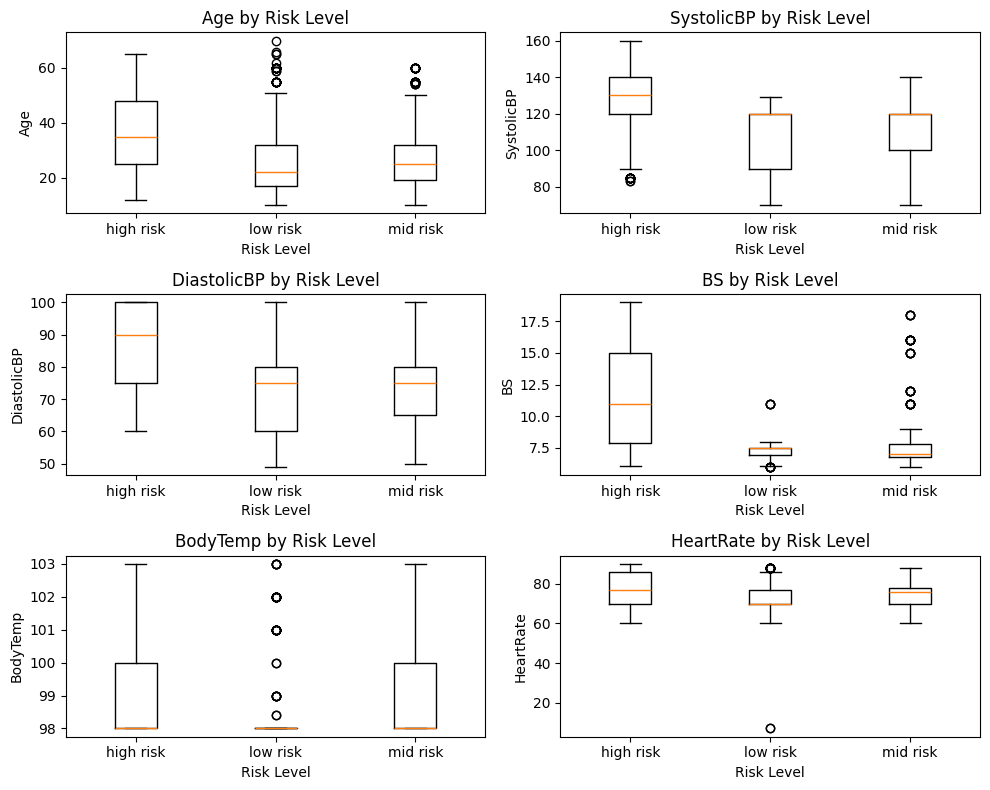

In [34]:

import matplotlib.pyplot as plt

# List of numerical columns to plot
columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Create a figure and axes
fig, axes = plt.subplots(3, 2, figsize=(10, 8))  # 3 rows, 2 columns
axes = axes.flatten()  # Flatten axes array for easy iteration

# Loop through each column and create a box plot
for i, column in enumerate(columns):
    # Group data by RiskLevel
    data_to_plot = [maternalHealthRisk_dataset[maternalHealthRisk_dataset['RiskLevel'] == level][column]
                    for level in maternalHealthRisk_dataset['RiskLevel'].unique()]
    
    # Create the box plot
    axes[i].boxplot(data_to_plot, tick_labels=maternalHealthRisk_dataset['RiskLevel'].unique())  
    
    # Set the title and labels
    axes[i].set_title(f'{column} by Risk Level')
    axes[i].set_xlabel('Risk Level')
    axes[i].set_ylabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



In our box plot we can see that for some of our features we have some extreme values.

We notice this for Age, Systolic BP,  Blood Sugar level, Body temperature and heart rate.

We will not be deleting these values as they could be hiding meaningful information

### Distribution of Pregnancy Risk Levels by Features

#### Age 

In [35]:
alt.Chart(maternalHealthRisk_dataset).mark_bar().encode(
    x=alt.X('Age:Q', bin=alt.Bin(maxbins=20), title="Age Group"),  # Group age into bins
    y='count():Q',  # Count of individuals in each age group
    color='RiskLevel:N',  # Color by RiskLevel
    tooltip=['Age', 'RiskLevel', 'count()']
).properties(
    title='Distribution of Risk Levels by Age',
    width=600,
    height=400
)



alt.Chart(...)

#### Systolic Blood Pressure 

In [36]:
# Distribution of Risk Levels by Systolic Blood Pressure
alt.Chart(maternalHealthRisk_dataset).mark_bar().encode(
    x=alt.X('SystolicBP:Q', bin=alt.Bin(maxbins=20), title="Systolic Blood Pressure (mmHg)"),
    y='count():Q',
    color='RiskLevel:N',
    tooltip=['SystolicBP', 'RiskLevel', 'count()']
).properties(
    title='Distribution of Risk Levels by Systolic Blood Pressure',
    width=600,
    height=400
)



alt.Chart(...)

#### Body Temperature

In [37]:
alt.Chart(maternalHealthRisk_dataset).mark_bar().encode(
    x=alt.X('BodyTemp:Q', bin=alt.Bin(maxbins=20), title="Body Temperature (°F)"),
    y='count():Q',
    color='RiskLevel:N',
    tooltip=['BodyTemp', 'RiskLevel', 'count()']
).properties(
    title='Distribution of Risk Levels by Body Temperature',
    width=600,
    height=400
)

alt.Chart(...)

####Heart Rate

In [38]:
alt.Chart(maternalHealthRisk_dataset).mark_bar().encode(
    x=alt.X('HeartRate:Q', bin=alt.Bin(maxbins=20), title="Heart Rate (bpm)"),
    y='count():Q',
    color='RiskLevel:N',
    tooltip=['HeartRate', 'RiskLevel', 'count()']
).properties(
    title='Distribution of Risk Levels by Heart Rate',
    width=600,
    height=400
)

alt.Chart(...)

4. **Analyse de la distribution des classes** : Examinez la distribution des étiquettes de classe au sein jeu de données. Utilisez des diagrammes en barres pour visualiser la fréquence des instances pour chaque classe et évaluez si l'ensemble de données est équilibré ou déséquilibré.


In [39]:
# Bar chart showing the distribution of Risk Levels 
chart_risk_distribution = alt.Chart(maternalHealthRisk_dataset, title="Distribution of Risk Levels").mark_bar().encode(
    alt.X("RiskLevel:N", title="Risk Level"), 
    y='count()',  # Count of each RiskLevel
    color='RiskLevel:N'  # Color each bar based on the RiskLevel
).properties(
    width=800,  # Set width to 800 pixels
    height=500  # Set height to 500 pixels
)

chart_risk_distribution



alt.Chart(...)

Nous notons que l'ensemble des données est relativement équilibré

5. **Prétraitement** : 

    5.1 Pour les attributs numériques, déterminez la meilleure transformation à utiliser. Indiquez la transformation qui semble appropriée et pourquoi. Incluez le code illustrant comment appliquer la transformation. Pour au moins un attribut, montrez la distribution avant et après la transformation. Voir [Prétraitement des données](https://scikit-learn.org/stable/modules/preprocessing.html).

    5.2 Pour les attributs catégoriels, montrez comment appliquer [l'encodage one-hot](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Si votre ensemble de données ne contient pas de données catégorielles, montrez comment appliquer l'encodeur one-hot à l'étiquette (variable cible).


#### Preprocessing and Transformations

For numerical attributes, I determined that the Box-Cox transformation is the most appropriate transformation to use. The Box-Cox transformation is effective because it normalizes data.

It makes the data more Gaussian-like, which is beneficial for many machine learning algorithms that assume normality. This is particularly useful when there are extreme values or when the distribution is skewed, like is the case in our particular datasets.

The decision to use Box-Cox was based on the fact that several of our attributes exhibited skewness, especially towards higher values, and Box-Cox is known to handle this well. By normalizing these features, the transformation reduces skewness, making the data more appropriate for models that require normality.

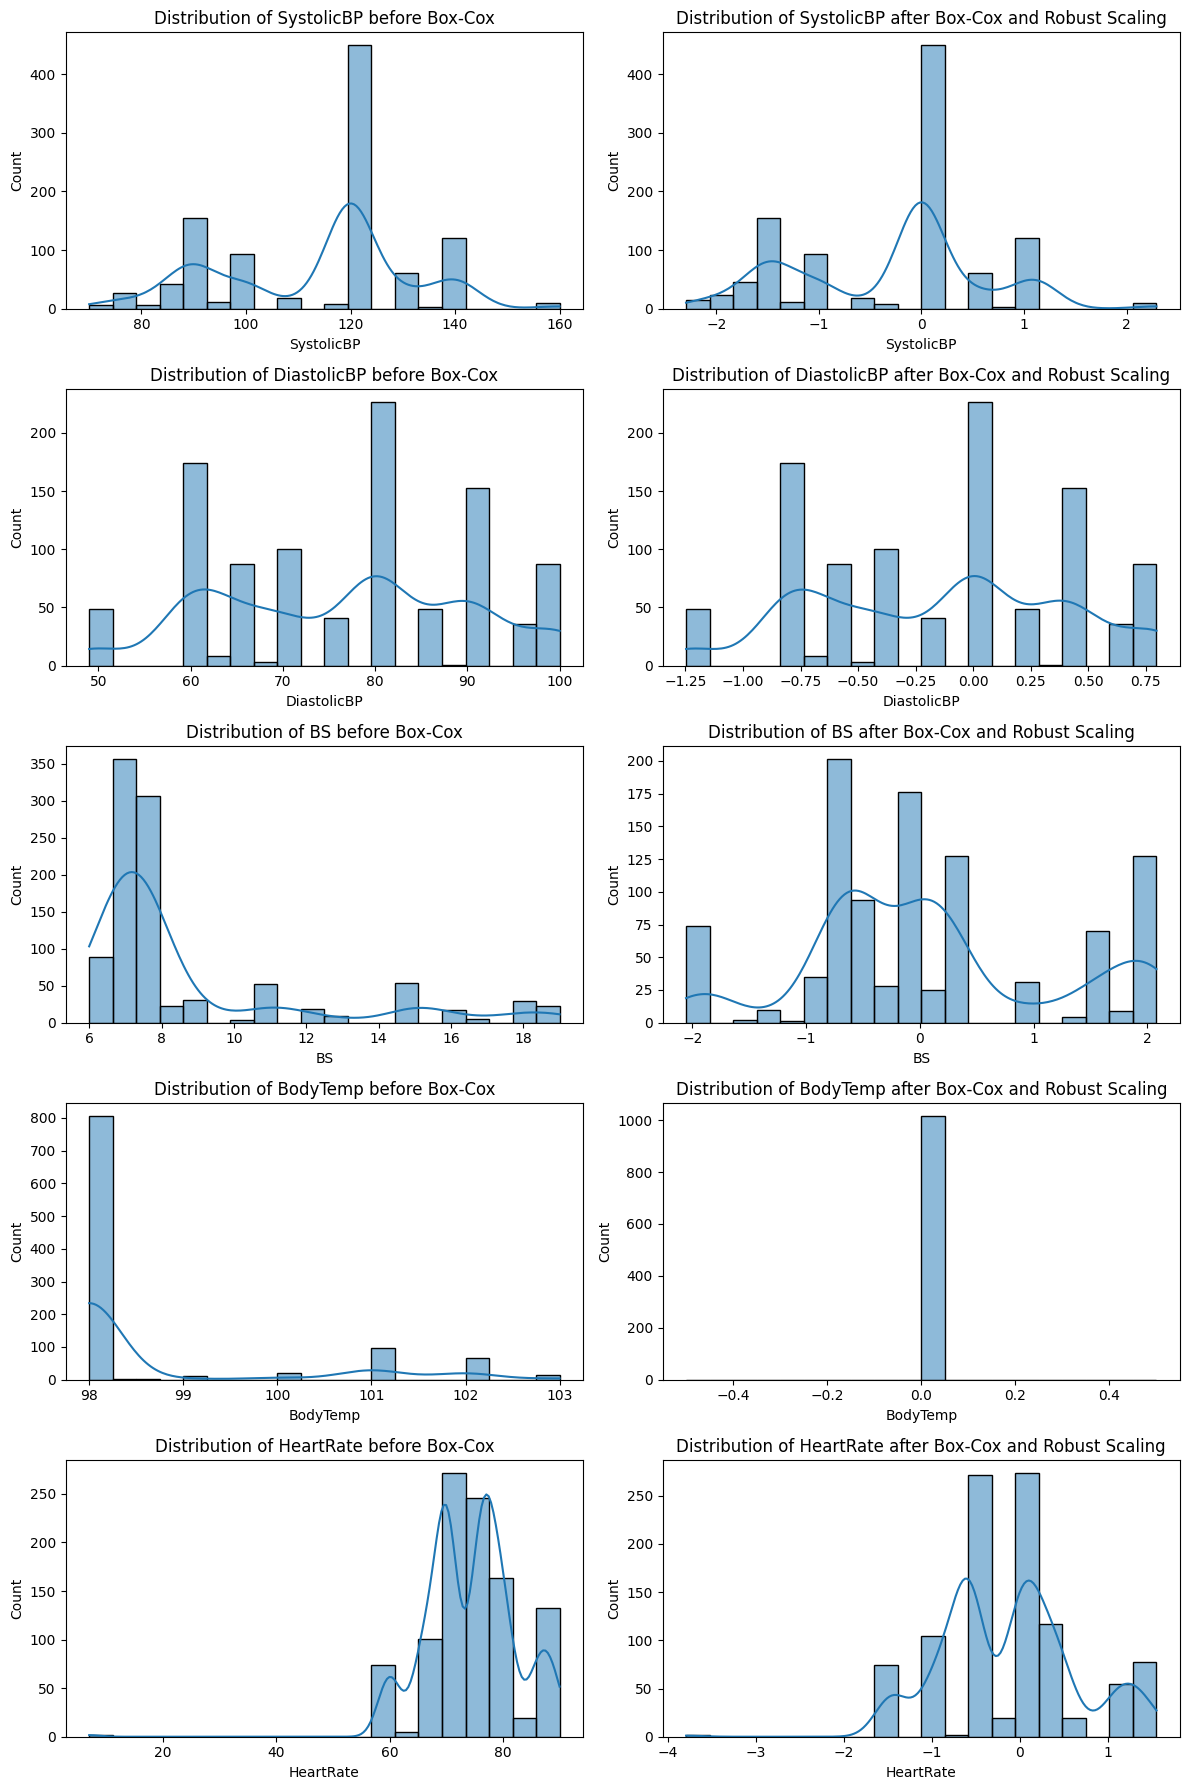

In [40]:

# List of numerical columns to transform
numerical_columns = ['SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Add a small constant to avoid zero or negative values (Box-Cox requires positive values)
maternalHealthRisk_dataset[numerical_columns] = maternalHealthRisk_dataset[numerical_columns] + 1e-6

# Apply Box-Cox transformation to each column and store lambda values
boxcox_transformed = {}
lambdas = {}

for column in numerical_columns:
    # Apply Box-Cox transformation and store the lambda 
    boxcox_transformed[column], lambdas[column] = boxcox(maternalHealthRisk_dataset[column])

# Creating a new dataframe for Box-Cox transformed data
boxcox_transformed_df = pd.DataFrame(boxcox_transformed)

# Apply RobustScaler to the Box-Cox transformed columns
robust_scaler = RobustScaler()
scaled_data = robust_scaler.fit_transform(boxcox_transformed_df)

# Create a new dataframe for scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Visualize the distributions before and after Box-Cox transformation and scaling
fig, axes = plt.subplots(5, 2, figsize=(12, 18))

for i, column in enumerate(numerical_columns):
    # Plot the original distribution (before Box-Cox transformation)
    sns.histplot(maternalHealthRisk_dataset[column], bins=20, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column} before Box-Cox')

    # Plotting the scaled distribution after using the Box-Cox Transformatuib and using RobustScaler
    sns.histplot(scaled_data_df[column], bins=20, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {column} after Box-Cox and Robust Scaling')

plt.tight_layout()
plt.show()


There are no categorical features in our data. Therefore, we apply one-hot encoding to the target variable, which is the risk level for pregnancy

In [41]:
maternalHealthRisk_dataset_copy = maternalHealthRisk_dataset.copy()

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(drop=None, sparse_output=False)  # Ensures we get a dense array

# Categorical column of Risk level
categorical = maternalHealthRisk_dataset_copy[["RiskLevel"]]

# Apply the encoding to the Risk Level column
encoded_data = one_hot_encoder.fit_transform(categorical)

encoded_column_names = one_hot_encoder.get_feature_names_out(['RiskLevel'])

# Create a DataFrame for the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoded_column_names)

# Concatenate the original dataset copy with the encoded columns
maternalHealthRisk_dataset_copy = pd.concat([maternalHealthRisk_dataset_copy, encoded_df], axis=1)


# After Modifications
maternalHealthRisk_dataset_copy


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,RiskLevel_high risk,RiskLevel_low risk,RiskLevel_mid risk
0,25,130.000001,80.000001,15.000001,98.000001,86.000001,high risk,1.0,0.0,0.0
1,35,140.000001,90.000001,13.000001,98.000001,70.000001,high risk,1.0,0.0,0.0
2,29,90.000001,70.000001,8.000001,100.000001,80.000001,high risk,1.0,0.0,0.0
3,30,140.000001,85.000001,7.000001,98.000001,70.000001,high risk,1.0,0.0,0.0
4,35,120.000001,60.000001,6.100001,98.000001,76.000001,low risk,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1009,22,120.000001,60.000001,15.000001,98.000001,80.000001,high risk,1.0,0.0,0.0
1010,55,120.000001,90.000001,18.000001,98.000001,60.000001,high risk,1.0,0.0,0.0
1011,35,85.000001,60.000001,19.000001,98.000001,86.000001,high risk,1.0,0.0,0.0
1012,43,120.000001,90.000001,18.000001,98.000001,70.000001,high risk,1.0,0.0,0.0


6. **Données d'entraînement et cible** : Définissez la variable Python `X` pour désigner les données et `y` pour désigner la classe cible. Assurez-vous de sélectionner uniquement les caractéristiques informatives.


In [42]:
x = maternalHealthRisk_dataset[['SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]  # Caracteristiques informatives
y = maternalHealthRisk_dataset['RiskLevel']


7. **Ensembles d'entraînement et de test** : Divisez l'ensemble de données en ensembles d'entraînement et de test. Réservez 20 % des données pour les tests.


In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Testing to see if it did the splitting correctly
print("Training Data Size:", X_train.shape)
print("Test Data Size:", X_test.shape)

Training Data Size: (811, 5)
Test Data Size: (203, 5)


--------------------------------------------------------------------------

# Références

Tanya Schmah's SDS-3386 Data Science Lab Lecture Slides and Notes from Fall 2023

Patrick Boily's Lecture Slides of MAT 3373 Methods of Machine Learning Fall 2023

https://github.com/JoeZhang1000/SDS3386-Midterm-Summary/blob/main/SDS%203386%20Midterm%20Summary.ipynb

https://www.geeksforgeeks.org/ml-handling-missing-values/

https://www.kaggle.com/code/anupamshah/how-to-handle-missing-categorical-features

https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

https://hex.tech/blog/visualizing-data-in-jupyter/

https://mode.com/example-gallery/python_histogram

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler

https://scikit-learn.org/stable/modules/preprocessing.html

https://www.geeksforgeeks.org/box-cox-transformation-using-python/

https://builtin.com/data-science/box-cox-transformation-target-variable#:~:text=SciPy%20has%20a%20boxcox%20function,value%20of%20lambda%20for%20us.&text=Simply%20pass%20a%201%2DD,confidence%20interval%20for%20that%20value.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

## Transcription AI
**Indice :** Pour partager un lien vers votre notebook Colab, cliquez sur "share" en haut à droite. Ensuite, sous *Accès général*, changez *Restreint* en "Toute personne avec le lien".